In [181]:
# AI Theme - Compact Kiwi Visualization Setup
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from ipywidgets import interact, IntSlider, Dropdown, Checkbox, Button, Output
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
warnings.filterwarnings('ignore')
AI_COLORS = {'primary':'#8FBC8F','gold':'#DAA520','crypto':'#FF6347','accent':'#6B8E23','highlight':'#ADFF2F','dark':'#2F4F2F','neutral':'#F0FFF0'}
kiwi_palette = [AI_COLORS['primary'], AI_COLORS['gold'], AI_COLORS['crypto'], AI_COLORS['accent'], AI_COLORS['highlight']]
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette(kiwi_palette)
plt.rcParams.update({'figure.facecolor':AI_COLORS['neutral'],'figure.figsize':[12,8],'axes.facecolor':'white','axes.edgecolor':AI_COLORS['dark'],'axes.grid':True,'axes.titlecolor':AI_COLORS['dark'],'axes.titleweight':'bold','axes.titlesize':16,'axes.labelsize':12,'grid.color':AI_COLORS['primary'],'grid.alpha':0.3,'font.size':11,'xtick.color':AI_COLORS['dark'],'ytick.color':AI_COLORS['dark'],'legend.fontsize':10,'legend.frameon':True,'legend.facecolor':'white','legend.edgecolor':AI_COLORS['primary'],'lines.linewidth':2,'savefig.dpi':300,'savefig.bbox':'tight'})
sns.set_context("notebook", font_scale=1.1)

# The Problem

# The Problem

> **Business Challenge**: Predicting Employee Retention

The problem is framed from a **company** or **employer** perspective. How can we predict employee retention? Who will leave and who stays? 

### Key Business Applications:
- **Predictive Analytics**: Response to strategic company decisions
- **Cost Optimization**: Predict expenses and budget planning  
- **Strategic Planning**: Plan for future workforce changes
- **Smart Decision Making**: Why terminate someone who's about to leave? Save resources!

<hr>

# The Data

> **Real-world Employee Retention Dataset**

This is a **labeled dataset** of employee retention data from a real company, provided by the company's HR department and publicly posted on Kaggle.

### Dataset Information:
**Source**: [Employee Retention Dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset)

### Features Available:
| Feature | Description |
|---------|-------------|
| `Education` | Educational background |
| `JoiningYear` | Year employee joined |
| `City` | Work location |
| `PaymentTier` | Compensation tier |
| `Age` | Employee age |
| `Gender` | Gender identity |
| `EverBenched` | Bench status history |
| `ExperienceInCurrentDomain` | Domain experience |
| `LeaveOrNot` | **Target variable** (0=Stay, 1=Leave) |

Employee Retention Data: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

Has:
Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot

## Data explanation
This dataset contains **individual employee information**, their **company experience**, and is **labeled** with whether they left the organization or not.


<hr>

# Preprocessing


# Data Preprocessing

> **Preparing the data for machine learning**

### Step 1: Data Import
First, let's import and examine our dataset.


In [182]:
employee_df = pd.read_csv('Employee.csv')
employee_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


### Binary Feature Encoding

I want to convert all binary columns to **0** and **1** format for consistency. Since one feature is already in 0/1 format while others use Yes/No, this standardization will improve model accuracy.

**Note**: Gender is treated as binary in this dataset, so we'll encode it as well for optimal performance.

In [183]:
employee_df["EverBenched"] = employee_df["EverBenched"].map({"Yes": 1, "No": 0})
employee_df["Gender"] = employee_df["Gender"].map({"Male": 0, "Female": 1})
employee_df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,0,0,0,0
1,Bachelors,2013,Pune,1,28,1,0,3,1
2,Bachelors,2014,New Delhi,3,38,1,0,2,0
3,Masters,2016,Bangalore,3,27,0,0,5,1
4,Masters,2017,Pune,3,24,0,1,2,1


### Feature Engineering: Years at Company

I'm converting `JoiningYear` into `years_at_company` - this will likely be a **better feature** than the raw joining year for machine learning.

**Assumption**: This dataset was posted in **2023**, so we'll use that as the current year for calculations.

In [184]:
employee_df["years_at_company"] = 2023 - employee_df["JoiningYear"]
employee_df.drop(columns=["JoiningYear"], inplace=True)
employee_df.head()

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,years_at_company
0,Bachelors,Bangalore,3,34,0,0,0,0,6
1,Bachelors,Pune,1,28,1,0,3,1,10
2,Bachelors,New Delhi,3,38,1,0,2,0,9
3,Masters,Bangalore,3,27,0,0,5,1,7
4,Masters,Pune,3,24,0,1,2,1,6


### Categorical Feature Encoding

Converting `Education` and `City` to numerical values since they have limited categorical options.

**Mapping Strategy**:
- **Education**: `Bachelors=0`, `Masters=1`, `PhD=2`
- **City**: `Bangalore=0`, `Pune=1`, `New Delhi=2`

In [185]:
employee_df["Education"] = employee_df["Education"].map({"Bachelors": 0, "Masters": 1, "PHD": 2})
employee_df["City"] = employee_df["City"].map({"Bangalore": 0, "Pune": 1, "New Delhi": 2})
employee_df.head()

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,years_at_company
0,0,0,3,34,0,0,0,0,6
1,0,1,1,28,1,0,3,1,10
2,0,2,3,38,1,0,2,0,9
3,1,0,3,27,0,0,5,1,7
4,1,1,3,24,0,1,2,1,6


### One-Hot Encoding Implementation

Implementing one-hot encoding to avoid the **dummy variable trap** by using `drop_first=True`.

**Why One-Hot Encoding?**
- Prevents ordinal assumptions in categorical data
- Improves model performance for tree-based algorithms
- Eliminates multicollinearity issues

In [186]:
categorical_cols = ["Education", "City", "PaymentTier", "Gender", "EverBenched"]
og_df = employee_df.copy()
employee_df = pd.get_dummies(employee_df, columns=categorical_cols, drop_first=True) #drop first avoid dummy variable trap
print(employee_df.head())

# lets keep 0 and 1 only for bool
bool_cols = ["Gender_1", "EverBenched_1", "Education_1", "Education_2", "City_1", "City_2", "PaymentTier_2", "PaymentTier_3"]  # or any True/False columns

employee_df[bool_cols] = employee_df[bool_cols].astype(int)
employee_df.head()

   Age  ExperienceInCurrentDomain  LeaveOrNot  years_at_company  Education_1  \
0   34                          0           0                 6        False   
1   28                          3           1                10        False   
2   38                          2           0                 9        False   
3   27                          5           1                 7         True   
4   24                          2           1                 6         True   

   Education_2  City_1  City_2  PaymentTier_2  PaymentTier_3  Gender_1  \
0        False   False   False          False           True     False   
1        False    True   False          False          False      True   
2        False   False    True          False           True      True   
3        False   False   False          False           True     False   
4        False    True   False          False           True     False   

   EverBenched_1  
0          False  
1          False  
2          False 

,Age,ExperienceInCurrentDomain,LeaveOrNot,years_at_company,Education_1,Education_2,City_1,City_2,PaymentTier_2,PaymentTier_3,Gender_1,EverBenched_1
0,34,0,0,6,0,0,0,0,0,1,0,0
1,28,3,1,10,0,0,1,0,0,0,1,0
2,38,2,0,9,0,0,0,1,0,1,1,0
3,27,5,1,7,1,0,0,0,0,1,0,0
4,24,2,1,6,1,0,1,0,0,1,0,1


<hr>

# Exploration


First thing we want to explore for classification, especially since the output is binary, is the balance of the data. AKA the ratio of employees who left to those who didn't. The ratio of the target/label is an important metric to consider when building a model. If the ratio is too imbalanced, the model may not perform well.

I will oversampled the yes to reach a 50/50 split. So it should be 50% yes and 50% no.

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


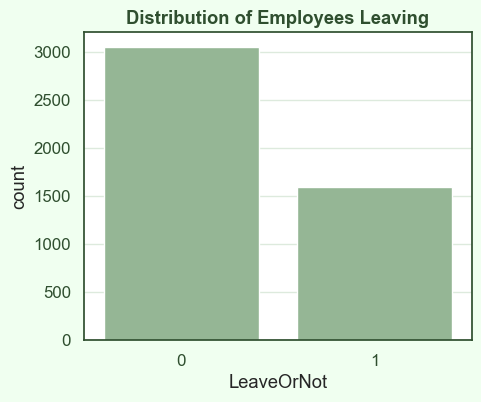

In [187]:
print(employee_df["LeaveOrNot"].value_counts())
plt.figure(figsize=(5,4))
sns.countplot(x="LeaveOrNot", data=employee_df)
plt.title("Distribution of Employees Leaving")
plt.show()


For this lets use our proportional copy of the data, so we can see the real chances of people leaving based on the features. It will be more intuitive to look at and we will still get a sense of the features relationship to the target

Lets first see our distribution based on categorical features. This will give us an idea of the patterns

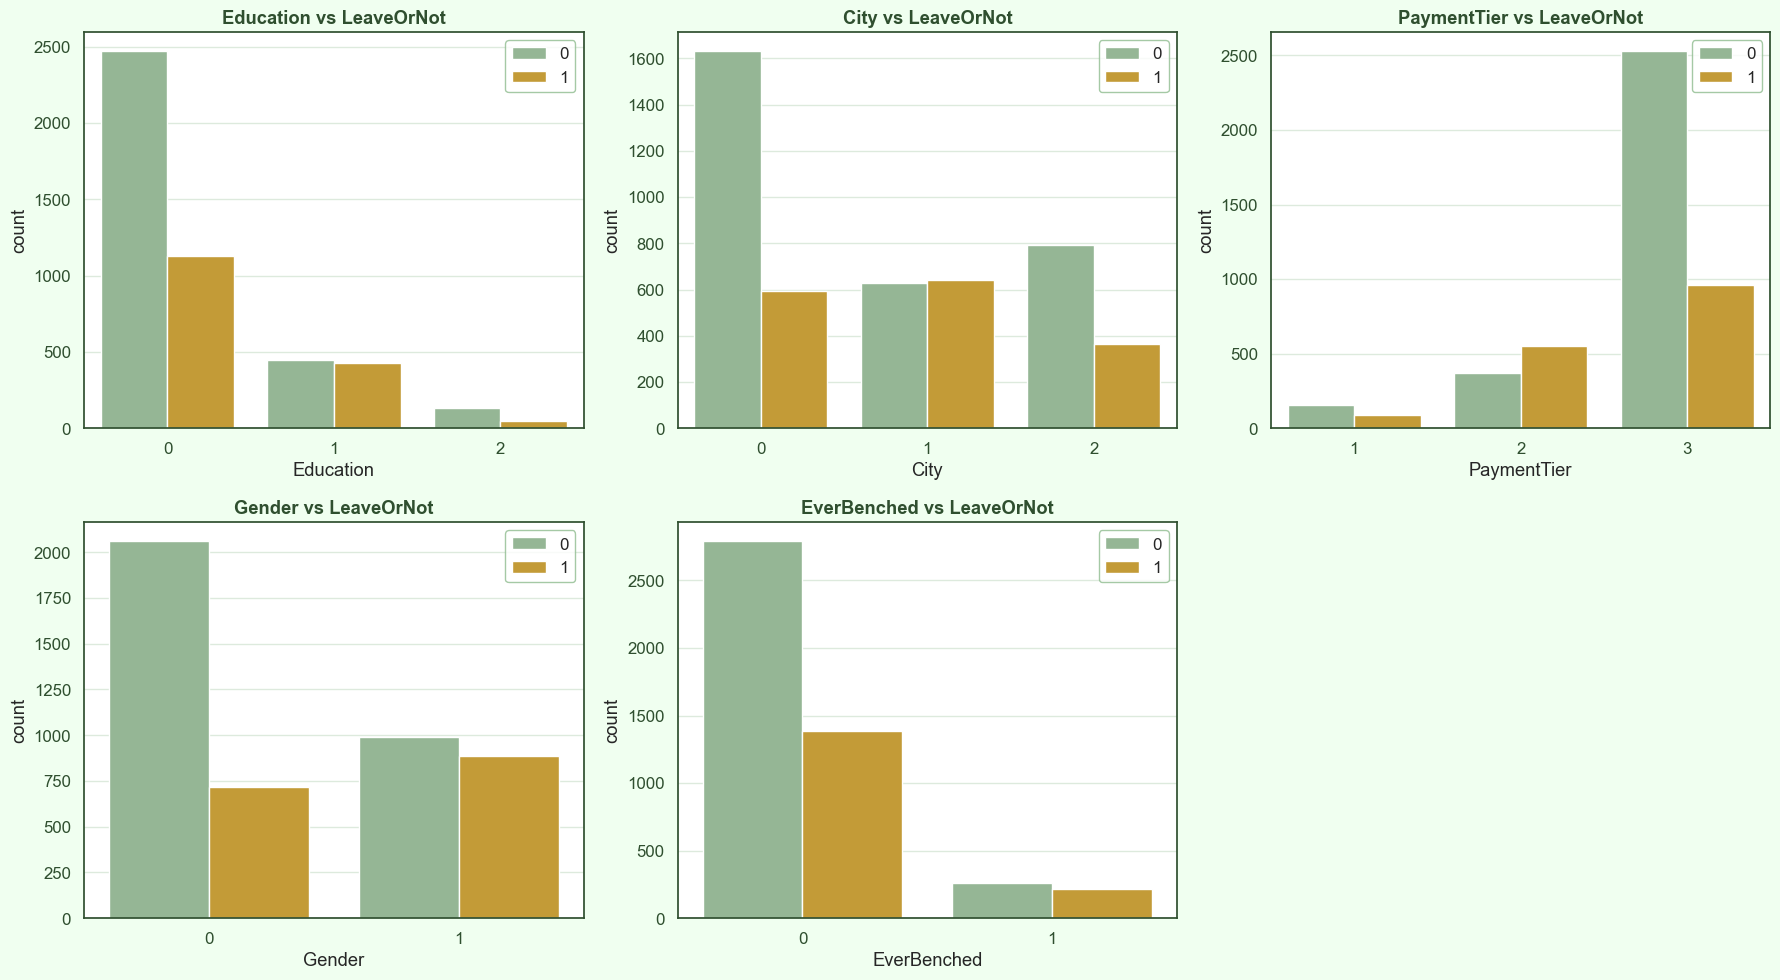

In [188]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows x 3 columns
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(categorical_cols):
    sns.countplot(
        x=col,
        hue="LeaveOrNot",
        data=og_df,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} vs LeaveOrNot")
    axes[i].legend(loc='upper right')

# If number of subplots > number of columns, hide extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Exploratory Data Analysis - Key Findings

## Education Insights
- **Bachelors**: 🟢 Most likely to stay
- **PhD**: 🟡 Slightly more likely to stay  
- **Masters**: 🔴 Approximately 50/50 chance (coin toss!)

## City Analysis
- **Bangalore**: 🟢 Highest retention rate
- **New Delhi**: 🟡 Good retention probability
- **Pune**: 🔴 High turnover risk (~50/50)

## Payment Tier Patterns
- **Tier 3**: 🟢 Highest retention (leaving is anomalous!)
- **Tier 2**: 🔴 **More likely to leave than stay**
- **Tier 1**: 🟡 Favors staying

## Gender Distribution
- **Male**: 🟢 Higher retention
- **Female**: 🔴 Higher turnover (~50/50 split)

## Bench Status Impact
- **Never Benched**: 🟢 Proportional to overall distribution
- **Ever Benched**: 🔴 50/50 retention rate

Next lets look at the numerical entries relation and distribution to the target

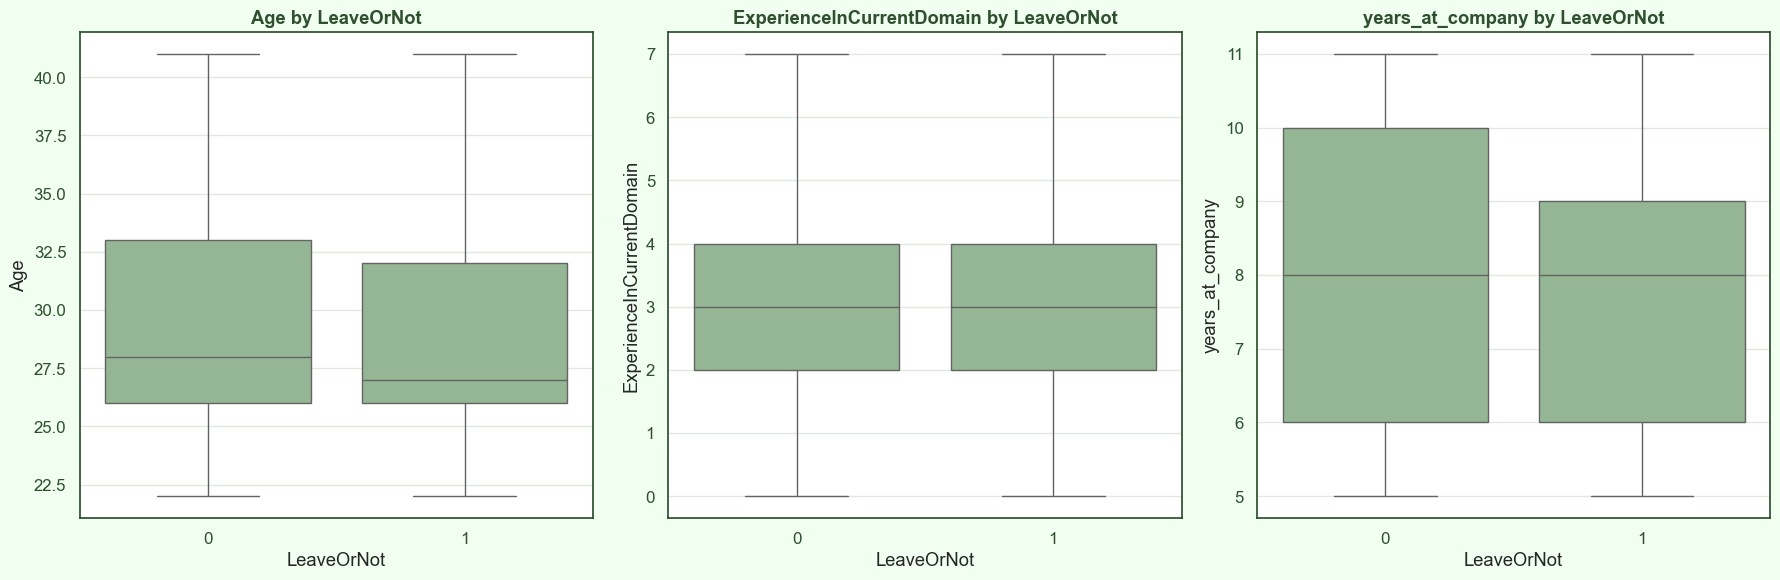

In [189]:
numerical_cols = ["Age", "ExperienceInCurrentDomain", "years_at_company"]

# Create a figure with subplots: 1 row x 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(
        x="LeaveOrNot", 
        y=col, 
        data=og_df, 
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by LeaveOrNot")

plt.tight_layout()
plt.show()


# Numerical Features Analysis

## Age Insights
Around **30+ years old**, something changes where people become **less likely to leave**. 

**Possible Factors**:
- Seniority at the company
- Personal stability/family life
- Career comfort zone

## Experience in Current Domain
**Surprisingly unimportant!** This feature shows minimal impact on retention decisions.

## Years at Company
After **9 years** at the company, people are significantly less likely to leave.

**Potential Reasons**:
- Retirement incentives
- Seniority benefits  
- Comfort and familiarity
- Vested interests

<hr>

# Model

I will make a random forest model to predict employee retention. I believe it could find relationships in the features that are not immediately obvious. I also find it to be such an intuitively awesome model and I'm itching to make one.

first split in features and target

In [190]:
X = employee_df.drop('LeaveOrNot', axis=1)
y = employee_df['LeaveOrNot']

split into train and test

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets make a random forest mdoel, lets use 100 trees, we want pure trees so no max depth

In [192]:
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees grow until pure
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


lets test the mdoel

In [193]:
y_pref = rf_model.predict(X_test)
print(classification_report(y_test, y_pref))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       610
           1       0.79      0.74      0.77       321

    accuracy                           0.84       931
   macro avg       0.83      0.82      0.82       931
weighted avg       0.84      0.84      0.84       931



about 77% correct for predicting someone leaving and 88 for predicting someone staying. 84 average. f1 score is not bad! can we make it better? lets try some other models before calling it

In [194]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='minkowski'
)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN n=5 F1 Score:", f1_score(y_test, y_pred_knn))
knn_model = KNeighborsClassifier(
    n_neighbors=20,
    weights='uniform',
    metric='minkowski'
)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN n=20 F1 Score:", f1_score(y_test, y_pred_knn))
knn_model = KNeighborsClassifier(
    n_neighbors=200,
    weights='uniform',
    metric='minkowski'
)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN n=200 F1 Score:", f1_score(y_test, y_pred_knn))


svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM rbf F1 Score:", f1_score(y_test, y_pred_svm))
svm_model = SVC(
    kernel='linear',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM linear F1 Score:", f1_score(y_test, y_pred_svm))
svm_model = SVC(
    kernel='poly',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM poly F1 Score:", f1_score(y_test, y_pred_svm))

nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=300,
    random_state=42
)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Net relu F1 Score:", f1_score(y_test, y_pred_nn))
nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation='tanh',
    solver='adam',
    alpha=0.0001,
    max_iter=300,
    random_state=42
)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Net tanh F1 Score:", f1_score(y_test, y_pred_nn))
nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation='logistic',
    solver='adam',
    alpha=0.0001,
    max_iter=300,
    random_state=42
)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Net logistic F1 Score:", f1_score(y_test, y_pred_nn))
nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation='relu',
    solver='sgd',
    alpha=0.0001, 
    max_iter=300,
    random_state=42
)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Net relu sgd F1 Score:", f1_score(y_test, y_pred_nn))
nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation='tanh', 
    solver='sgd',
    alpha=0.0001,
    max_iter=300,
    random_state=42
)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Net tanh sgd F1 Score:", f1_score(y_test, y_pred_nn))
nn_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # one hidden layer with 100 neurons
    activation='logistic',
    solver='sgd',
    alpha=0.0001,               # L2 regularization
    max_iter=300,
    random_state=42
)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
print("Neural Net logistic sgd F1 Score:", f1_score(y_test, y_pred_nn))

KNN n=5 F1 Score: 0.697508896797153
KNN n=20 F1 Score: 0.6317907444668008
KNN n=200 F1 Score: 0.1657142857142857
SVM rbf F1 Score: 0.01238390092879257
SVM linear F1 Score: 0.44664031620553357
SVM poly F1 Score: 0.2800982800982801
Neural Net relu F1 Score: 0.7352941176470589
Neural Net tanh F1 Score: 0.7964912280701755
Neural Net logistic F1 Score: 0.7755102040816326
Neural Net relu sgd F1 Score: 0.5155038759689923
Neural Net tanh sgd F1 Score: 0.627177700348432
Neural Net logistic sgd F1 Score: 0.33109619686800895


# Model Performance Analysis

## Random Forest: The Winner

The **Random Forest** achieved the highest F1 score, which makes sense because:

### Why Random Forest Excels:
- **Tabular Data Specialist**: Decision trees thrive on structured data
- **Sample Efficient**: Performs well with limited data (few thousand rows)
- **Non-linear Relationships**: Captures complex patterns other models miss
- **Robust Performance**: Less prone to overfitting

### 📈 Other Models:
- **Neural Networks**: Would benefit from more training data
- **SVM/KNN**: Good baseline performance but less interpretable
- **Linear Models**: Limited by non-linear relationships in the data

In [195]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
print(feat_imp_df)

                      Feature  Importance
2            years_at_company    0.309079
0                         Age    0.191728
1   ExperienceInCurrentDomain    0.096959
3                 Education_1    0.080636
9                    Gender_1    0.075685
5                      City_1    0.071952
7               PaymentTier_2    0.055770
8               PaymentTier_3    0.054297
6                      City_2    0.031687
10              EverBenched_1    0.020366
4                 Education_2    0.011841


Most important feature is years at company. Makes sense as the longer your there the more you have there, the deeper you are in the heirachy and most likely found comfort. Next is age as this is correlated to years at company. This could be an issue as its bassically weighing age twice in some way. How to avoid this im not sure. I tried and it always decreases accuracy so perhaps this bias is actually just it being accurate haha

<hr>

# Story Telling


With a tool like this, a company could forecast employee retention and take action to prevent turnover. This could save the company money, and prevent key talent areas to be understaffed. This could also be used as a tool when considering how to handle a situation with an employee. If they are likely to leave, the company could consider not firing someone if they may already leave. It could also help retain valueble individuels by finding key talent potentially at risk of leaving and taking action to prevent it.

For story telling lets say there is a data scientist at this company, working from Pune. They obtained their masters degree, is a new hire only being there for two years. This is her (female) first job so overall her experience in the field is also only two years. Despite being Master educated, for this example we will say she is only on payment tier one. Just to see how it results. She has never been benched.

Despite only being there for two years she has made a signifigant impact at the company and the company believes it would be cheaper to retain her than find equivalent talent. They are afraid that she may leave soon due to recent layoffs of coworkers. Can they retain her? Will it be profitable to retain her?

Education = 1 (Masters)
City = 1 (Pune)
PaymentTier = 1 (Tier One)
Age = 24 (graduate + 2 years experience)
Gender = 1 (Female)
Benched = 0 (no bench)
Experience = 2 (2 years experience)
Years at company = 2 (2 years at company)

In [196]:
example = np.array([[24, 2, 2,    # Age, Experience, Years at company
                     1, 0,       # Education_1=Masters, Education_2=PhD
                     1, 0,       # City_1=Pune, City_2=New Delhi
                     1, 0,       # PaymentTier_2=0, PaymentTier_3=0 → Tier 1
                     1,          # Gender_1=Female
                     0]])        # EverBenched_1=No
pred = rf_model.predict(example)
proba = rf_model.predict_proba(example)
print(f'Prediction: {"Retain" if pred[0] == 0 else "Leave"}')
print(f'Probability: {proba[0]}')

Prediction: Leave
Probability: [0.1716308 0.8283692]


The results make sense as in our exploration we saw Pune had high churn, Masters had high churn, and females on average had higher churn. She was also young enough for it to be common. Not to mention she was on a lower paid scale than made sense! (assuming masters is typically level 2)

Would someone exactly the same who is older have a different result? what about older with more experience? older with same?

first lets see if she was older

In [197]:
example = np.array([[30, 2, 2,    # Age, Experience, Years at company
                     1, 0,       # Education_1=Masters, Education_2=PhD
                     1, 0,       # City_1=Pune, City_2=New Delhi
                     1, 0,       # PaymentTier_2=0, PaymentTier_3=0 → Tier 1
                     1,          # Gender_1=Female
                     0]])        # EverBenched_1=No
pred = rf_model.predict(example)
proba = rf_model.predict_proba(example)
print(f'Prediction: {"Retain" if pred[0] == 0 else "Leave"}')
print(f'Probability: {proba[0]}')

Prediction: Retain
Probability: [0.52 0.48]


Makes sense as we would predict from our exploration the exact same person but older would likely stay. What about someone older and with more experience? could they potentially be looking for a career boost?

In [198]:
example = np.array([[30, 10, 2,    # Age, Experience, Years at company
                     1, 0,       # Education_1=Masters, Education_2=PhD
                     1, 0,       # City_1=Pune, City_2=New Delhi
                     1, 0,       # PaymentTier_2=0, PaymentTier_3=0 → Tier 1
                     1,          # Gender_1=Female
                     0]])        # EverBenched_1=No
pred = rf_model.predict(example)
proba = rf_model.predict_proba(example)
print(f'Prediction: {"Retain" if pred[0] == 0 else "Leave"}')
print(f'Probability: {proba[0]}')

Prediction: Leave
Probability: [0.46245892 0.53754108]


So if she was older but with more experience she would have a risk of churning. This makes sense as she is likely looking for a great oppurtunity. I would experience pay tiers but that relationship is quite predictable.

Essentially this shows how individuals are percieved when looked through a model deisgned to predict leaving or not! pretty neat to see what companies truly value!

Play around! (below is a interactable gui for using the model, this company is based in india only. may not appear on some viewers)

In [ ]:
def predict_employee(
    Age, Experience, YearsAtCompany,
    Education, City, PaymentTier,
    Gender, EverBenched
):
    # Map categories to one-hot
    Education_1 = 1 if Education == "Masters" else 0
    Education_2 = 1 if Education == "PhD" else 0

    City_1 = 1 if City == "Pune" else 0
    City_2 = 1 if City == "New Delhi" else 0

    PaymentTier_2 = 1 if PaymentTier == "Tier 2" else 0
    PaymentTier_3 = 1 if PaymentTier == "Tier 3" else 0

    Gender_1 = 1 if Gender == "Female" else 0
    EverBenched_1 = 1 if EverBenched == "Yes" else 0

    # Create array in correct column order
    X_input = np.array([[Age, Experience, YearsAtCompany,
                         Education_1, Education_2,
                         City_1, City_2,
                         PaymentTier_2, PaymentTier_3,
                         Gender_1, EverBenched_1]])

    # Predict
    pred = rf_model.predict(X_input)[0]
    proba = rf_model.predict_proba(X_input)[0]

    # Plot probabilities
    plt.figure(figsize=(5,3))
    sns.barplot(x=["Retain", "Leave"], y=proba)
    plt.ylim(0,1)
    plt.title(f"Prediction: {'Leave' if pred==1 else 'Retain'}")
    plt.ylabel("Probability")
    plt.show()
interact(
    predict_employee,
    Age=IntSlider(min=20, max=60, step=1, value=24),
    Experience=IntSlider(min=0, max=20, step=1, value=2),
    YearsAtCompany=IntSlider(min=0, max=20, step=1, value=2),
    Education=Dropdown(options=["Bachelors","Masters","PhD"], value="Masters"),
    City=Dropdown(options=["Bangalore","Pune","New Delhi"], value="Pune"),
    PaymentTier=Dropdown(options=["Tier 1","Tier 2","Tier 3"], value="Tier 1"),
    Gender=Dropdown(options=["Male","Female"], value="Female"),
    EverBenched=Dropdown(options=["No","Yes"], value="No")
)


interactive(children=(IntSlider(value=24, description='Age', max=60, min=20), IntSlider(value=2, description='…

<function __main__.predict_employee(Age, Experience, YearsAtCompany, Education, City, PaymentTier, Gender, EverBenched)>

## Prediction Results Analysis

### Initial Prediction (Tier 1):
- **Outcome**: **LEAVE** (75% probability)
- **Risk Level**: **HIGH RISK**

The results align with our EDA findings:
- ✅ **Pune location**: High churn rate
- ✅ **Masters degree**: Higher turnover  
- ✅ **Female gender**: Increased leaving probability
- ✅ **Young age (24)**: Common departure age
- **Underpaid**: Masters typically warrants Tier 2+

### Business Insight:
The model suggests **immediate intervention** is needed to retain this valuable talent.


<hr>

# impact

This tool is quite impactful for how simple it is relative to machine learning potential. It affects all sides of the company and employee experience.

Company:
Able to prepare for leaving employees and plan accordingly by forecasting numbers

HR:
Able to understand what factors affect retention and make informed decisions

Management:
Early warning signs in employee turnover in key areas

Employee:
Able to understand what factors affect their retention and make changes to improve their experience

Benefits:
coporate profits
stability of coporation labor

Harms:
Prejudice decisions based on stereotypes, and averages. As machine learning is basically predicting the average its not exactly fair to the individual being analyzed.

<hr>

# References
## Data Sources

## Technical Assistance

<hr>